In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



## Linearly separable dataset
Let us create an example of a linearly separable dataset for binary classification.



In [21]:
X1 = np.random.random(200)
X2 = np.random.random(200)

XX1 = []
XX2 = []
Y = []

for x1, x2 in zip (X1, X2): 
    y =  x1 - x2
    
    if abs(y)>0.08:
        XX1.append(x1)
        XX2.append(x2)
        Y.append(np.sign(y))
    
data = pd.DataFrame(data={'x1':XX1, 'x2':XX2, 'y':Y})

data.head()
    


x1        x2    y
0  0.148663  0.885978 -1.0
1  0.414624  0.615863 -1.0
2  0.085350  0.232959 -1.0
3  0.996874  0.024401  1.0
4  0.502195  0.870099 -1.0

<Axes: xlabel='x1', ylabel='x2'>

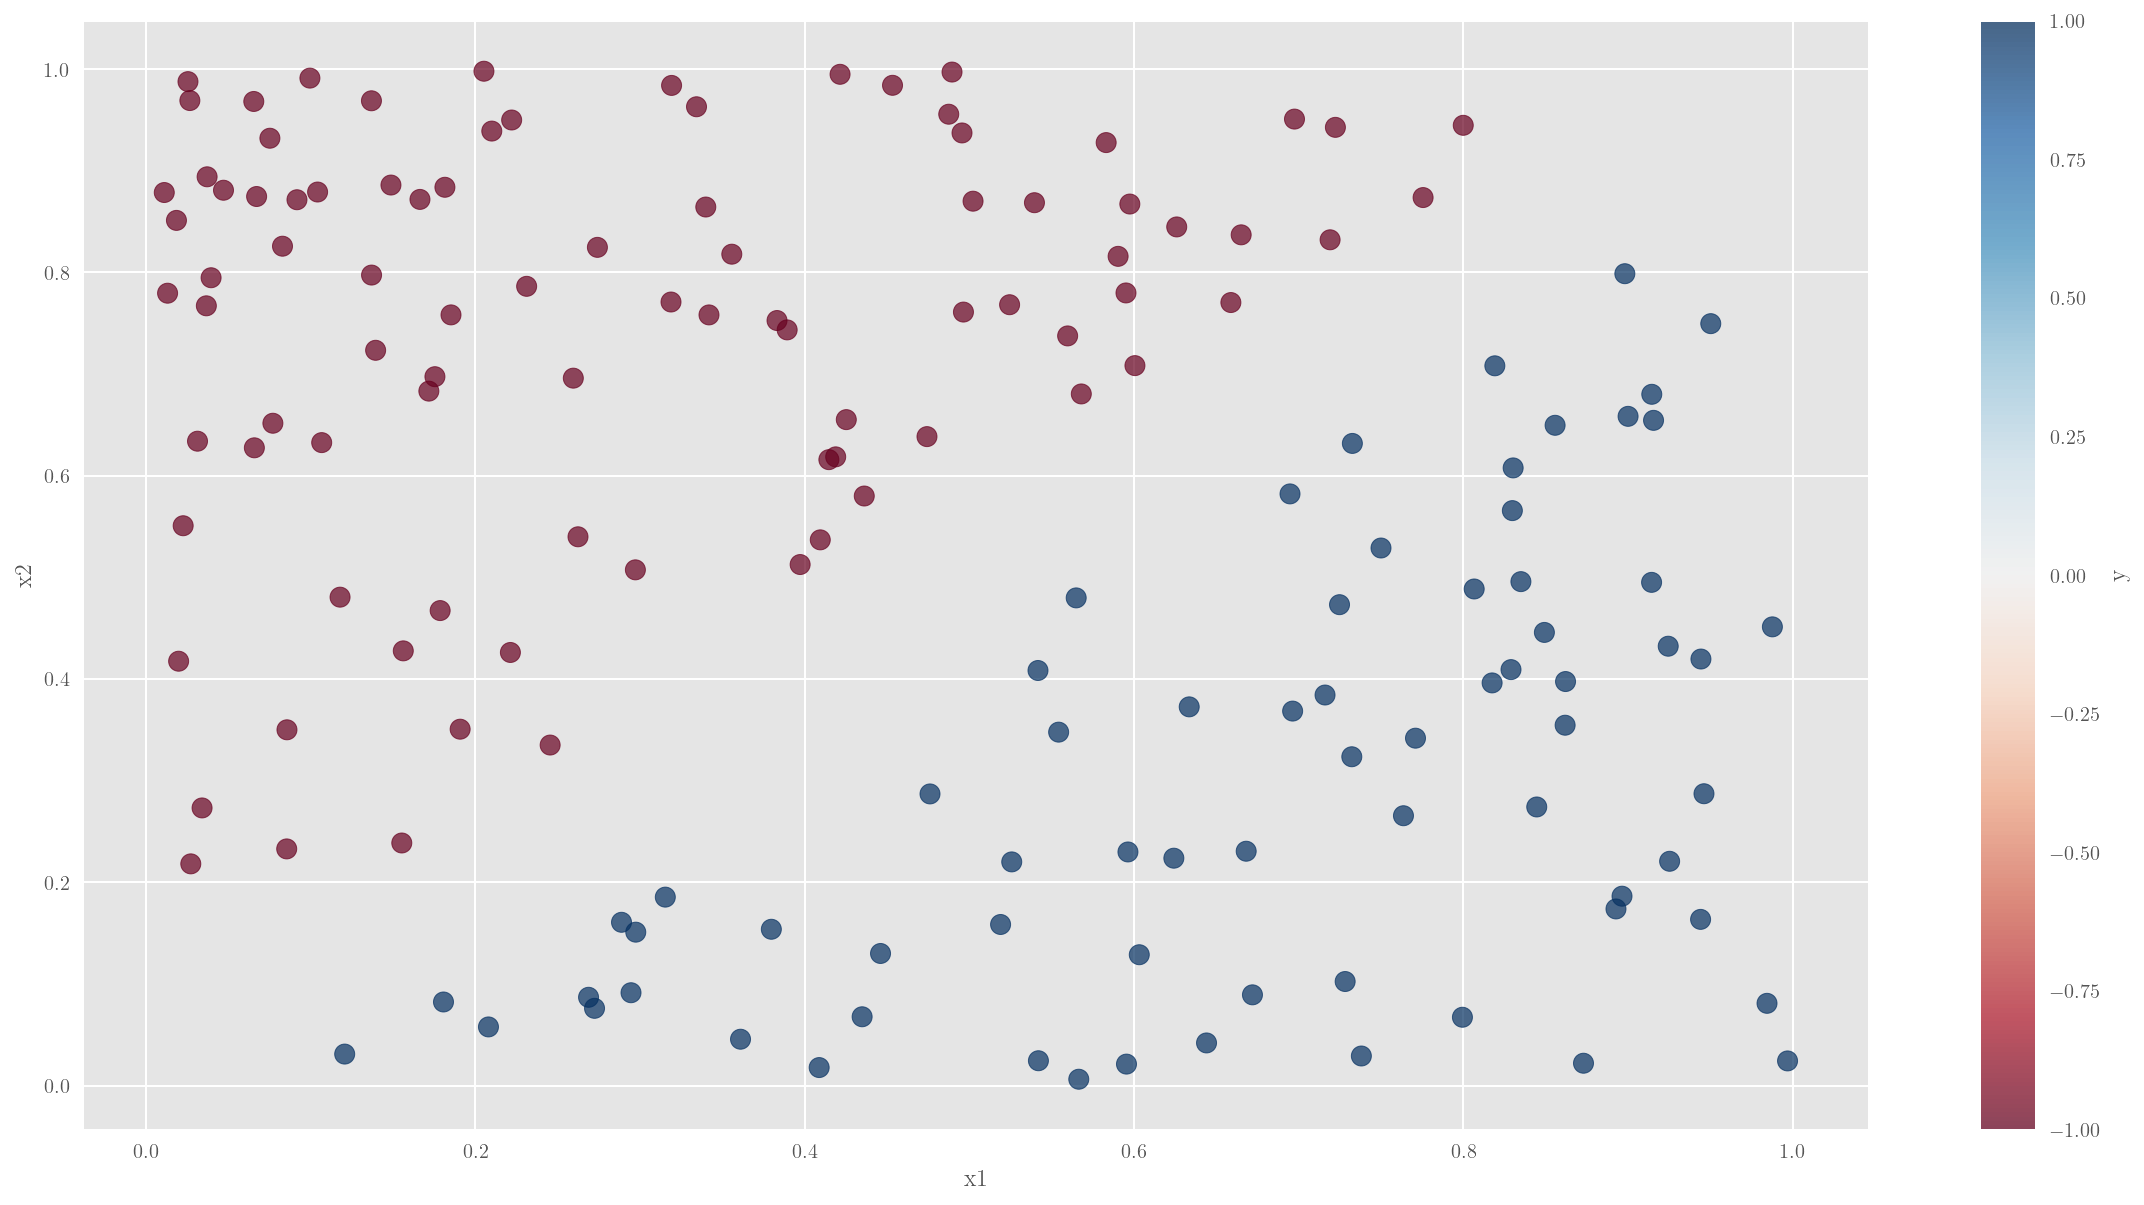

In [23]:
data.plot.scatter('x1', 'x2', c='y', cmap='RdBu', s=100, alpha=0.7)

In [24]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

X, y = data[['x1', 'x2']], data.y

classifier = SVC(kernel='linear', C=1000)
classifier.fit(X, y)

SVC(C=1000, kernel='linear')

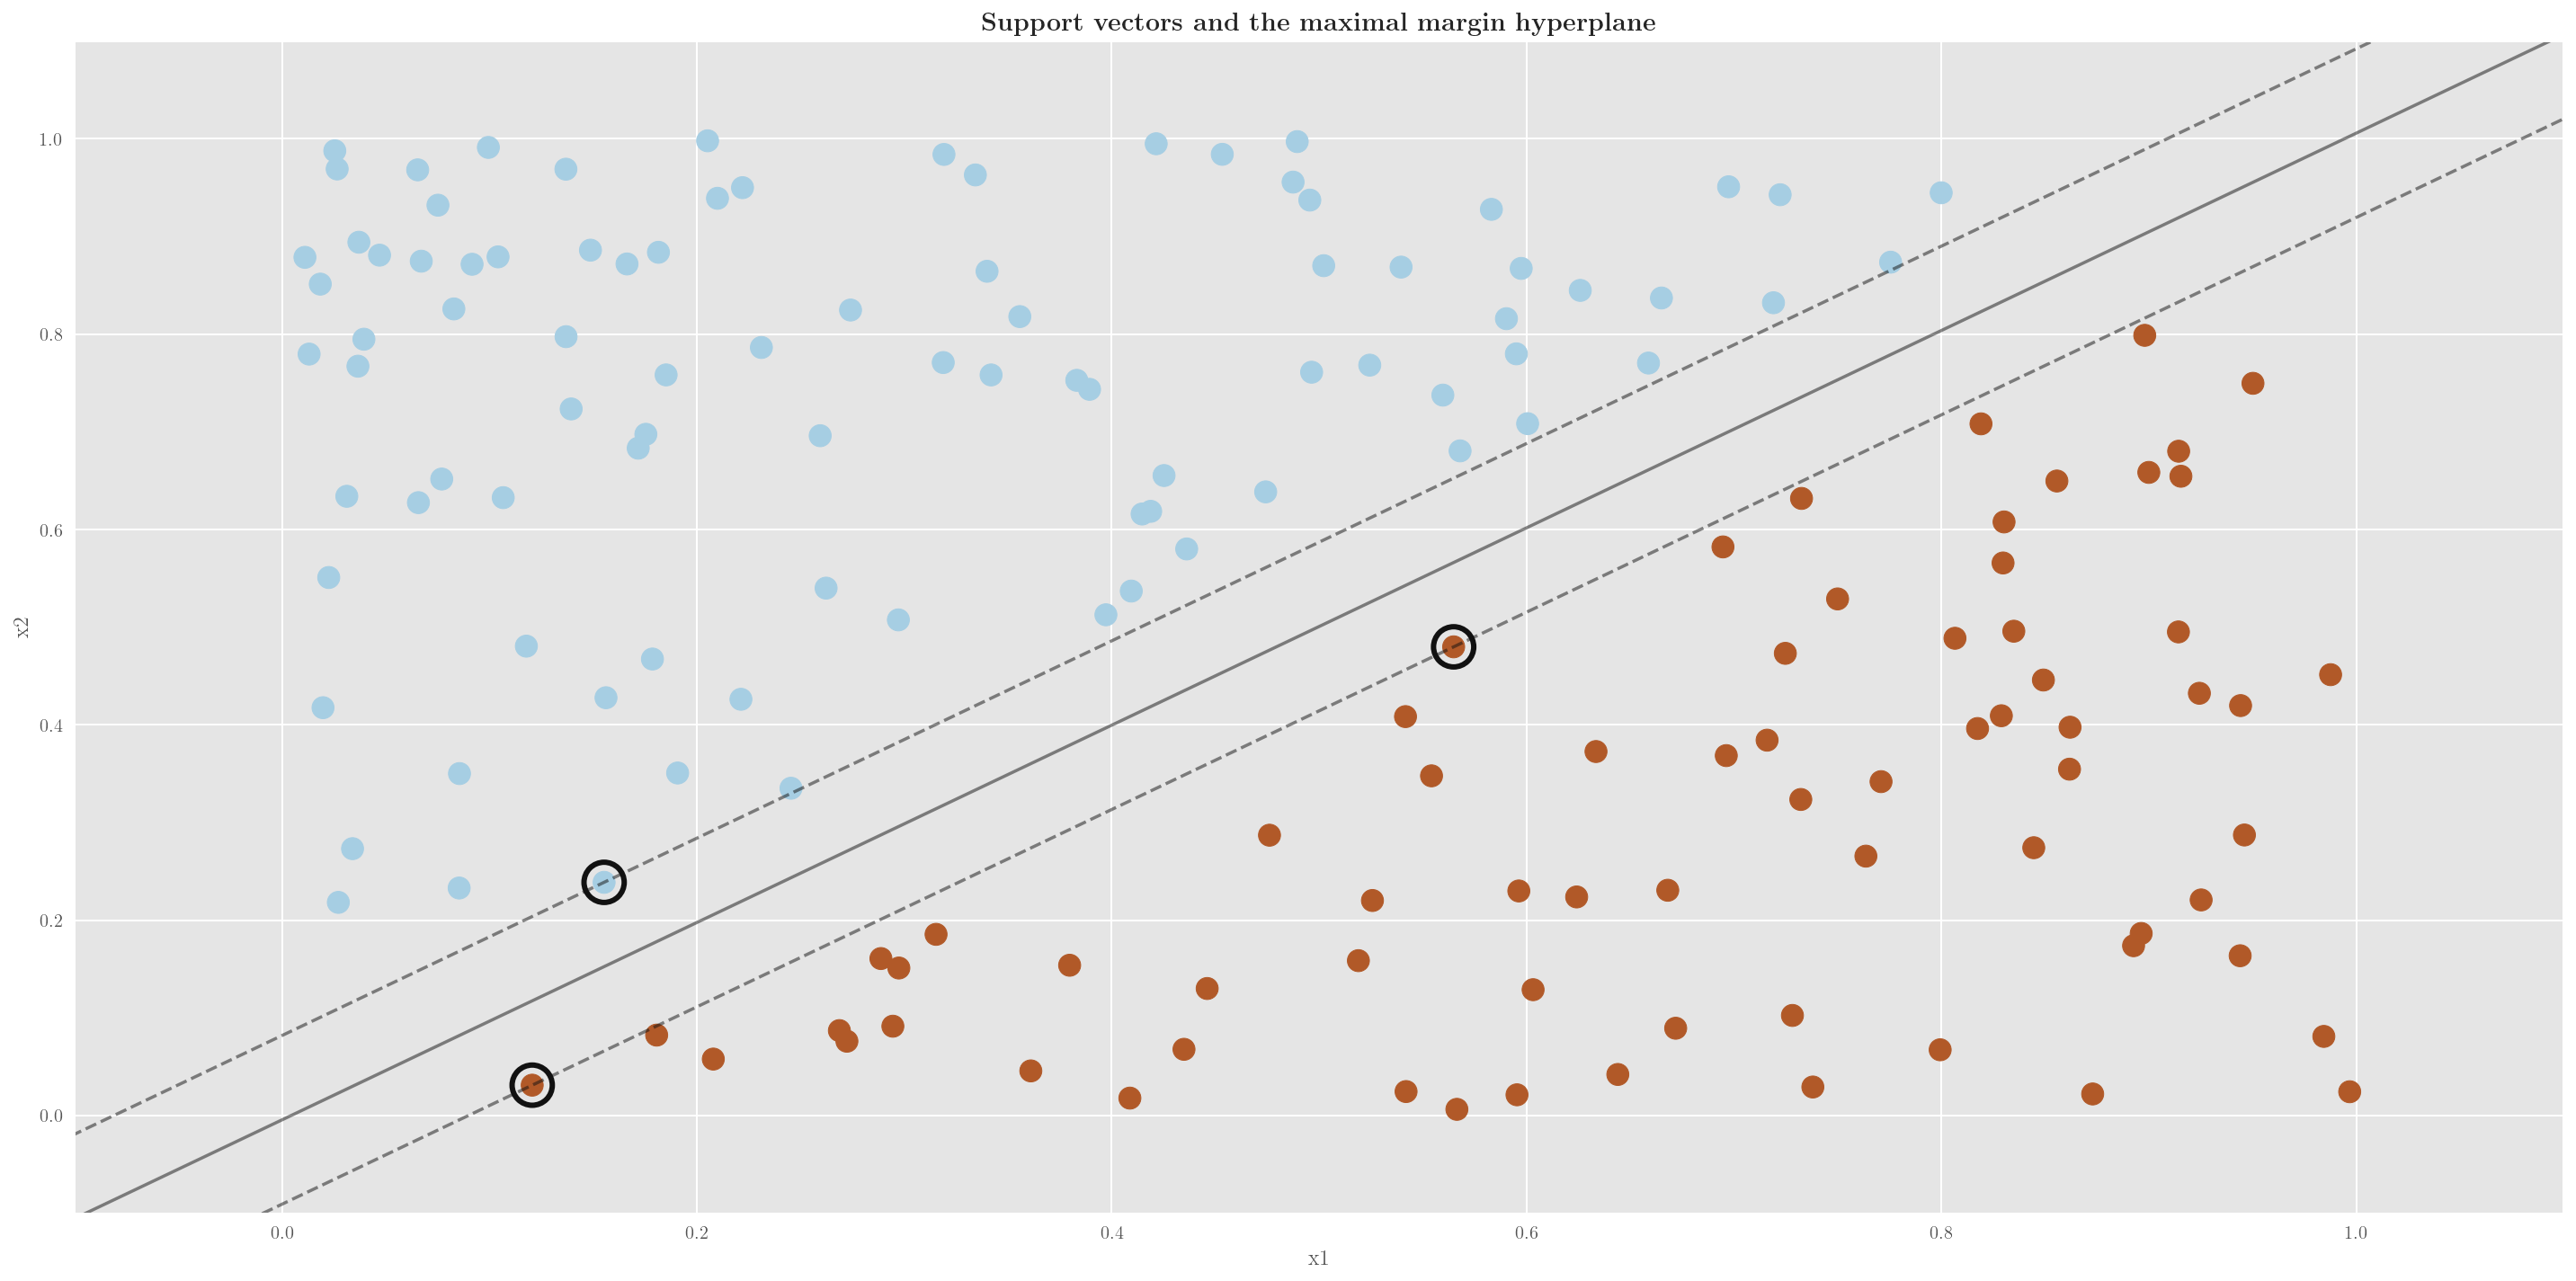

In [25]:

plt.scatter(X.x1, X.x2, c=y, s=150, cmap=plt.cm.Paired)

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    classifier,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)



# plot support vectors
ax.scatter(
    classifier.support_vectors_[:, 0],
    classifier.support_vectors_[:, 1],
    s=500,
    linewidth=3,
    facecolors="none",
    edgecolors="k",
    alpha=1.0
)
plt.title(r'\textbf{Support vectors and the maximal margin hyperplane}')
plt.tight_layout()

## Soft margin classifier

Now, let us now introduce some noise or errors in the dataset, and see what happens.

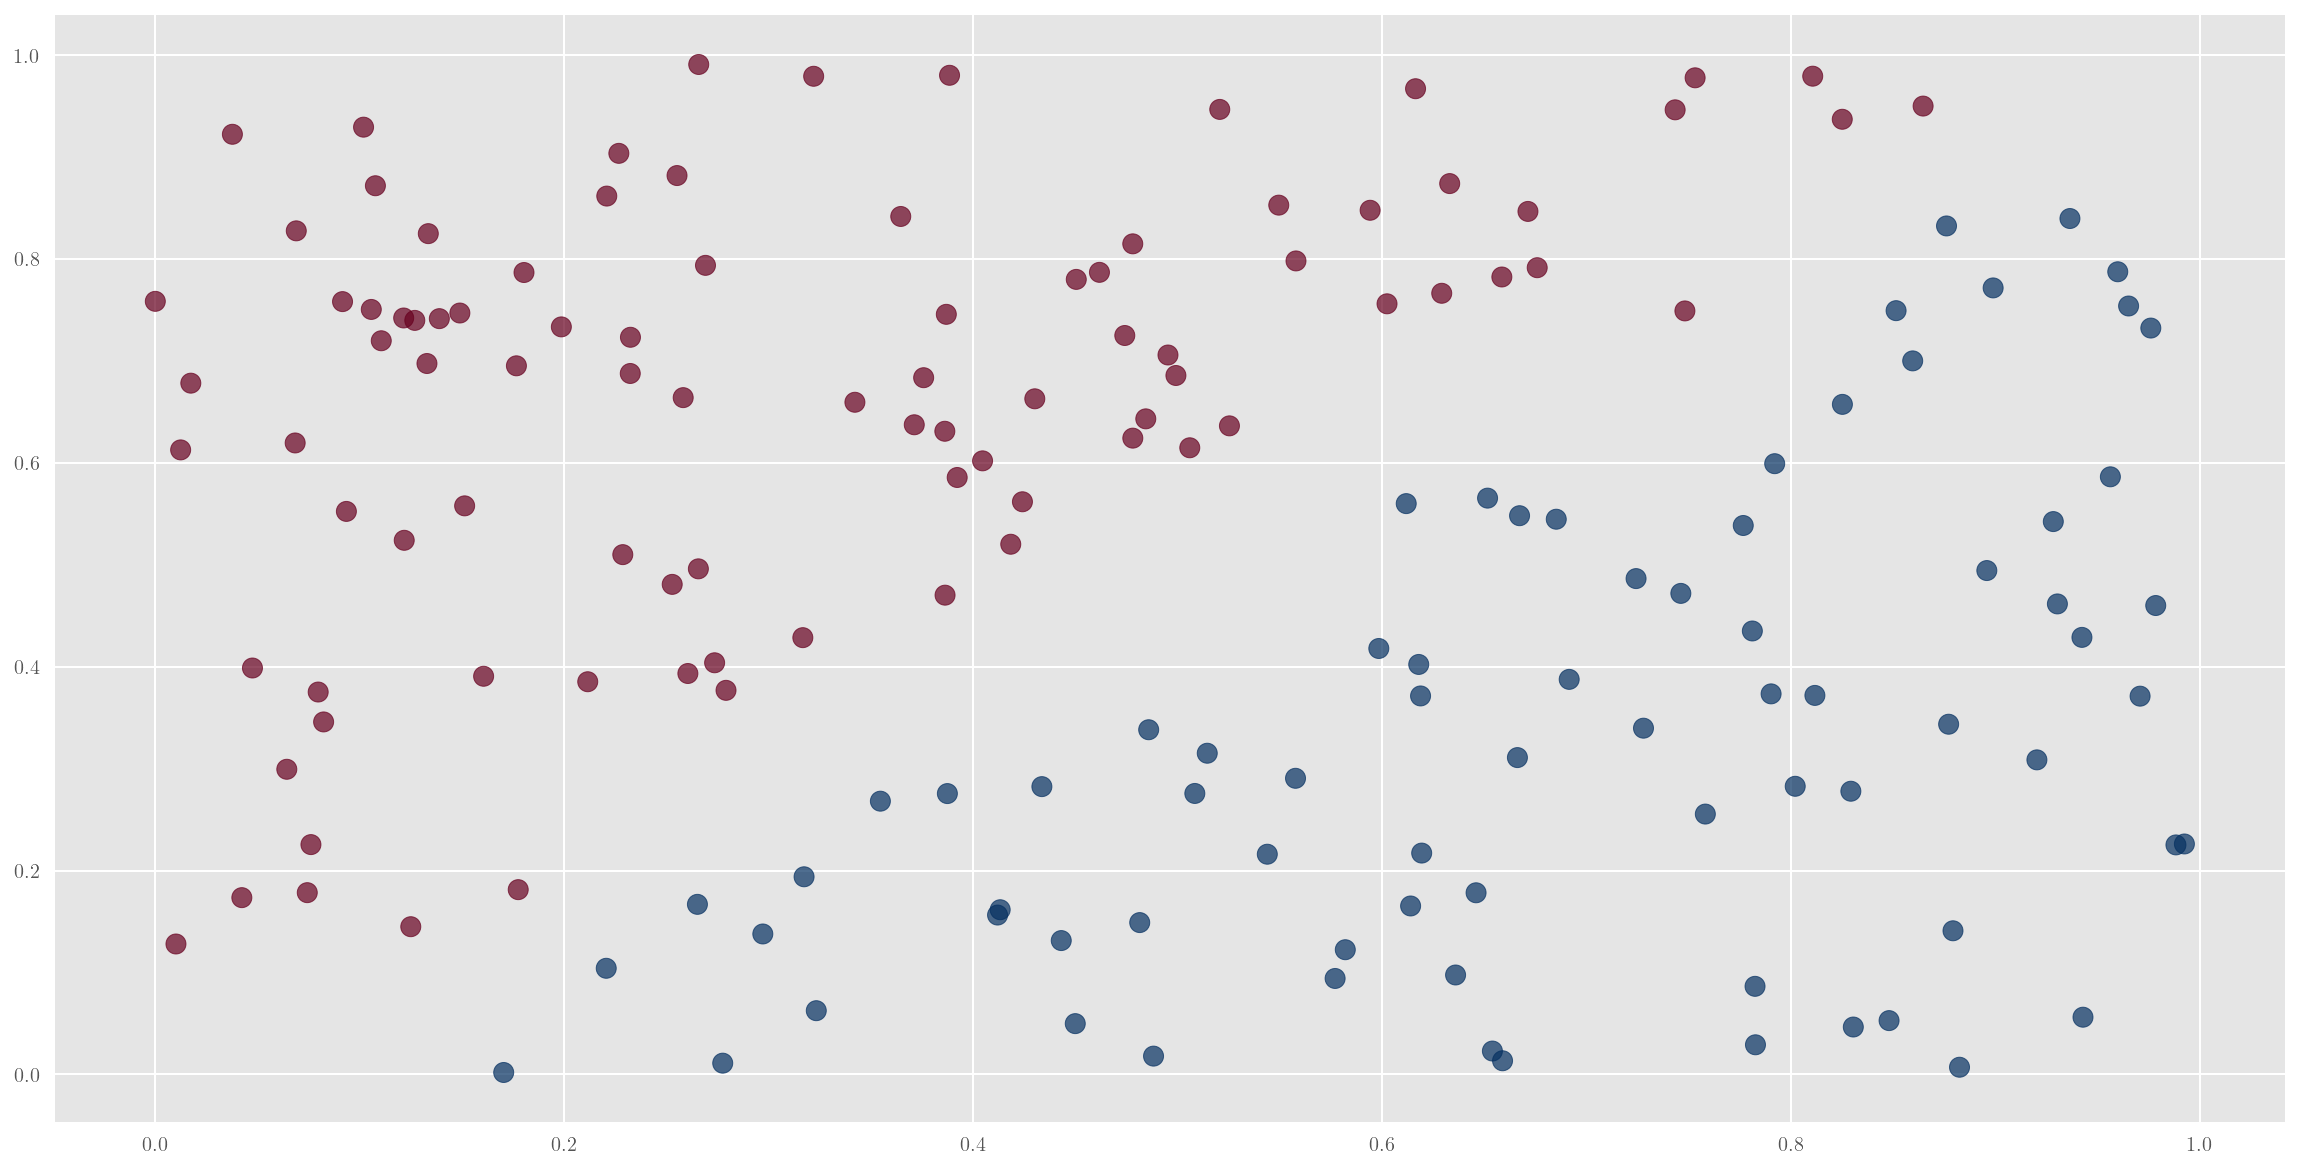

In [27]:
X1 = np.random.random(200)
X2 = np.random.random(200)

XX1 = []
XX2 = []
Y = []

for x1, x2 in zip (X1, X2): 
    y =  x1 - x2
    
    if abs(y)>0.08 or np.random.random() < 0.15:
        XX1.append(x1)
        XX2.append(x2)
        Y.append(np.sign(y))     
    
data = pd.DataFrame(data={'x1':XX1, 'x2':XX2, 'y':Y})

plt.scatter(XX1, XX2, c=Y, cmap='RdBu', s=100, alpha=0.7);
    

In [28]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

X, y = data[['x1', 'x2']], data.y

classifier = SVC(kernel='linear', C=100)
classifier.fit(X, y)

SVC(C=100, kernel='linear')

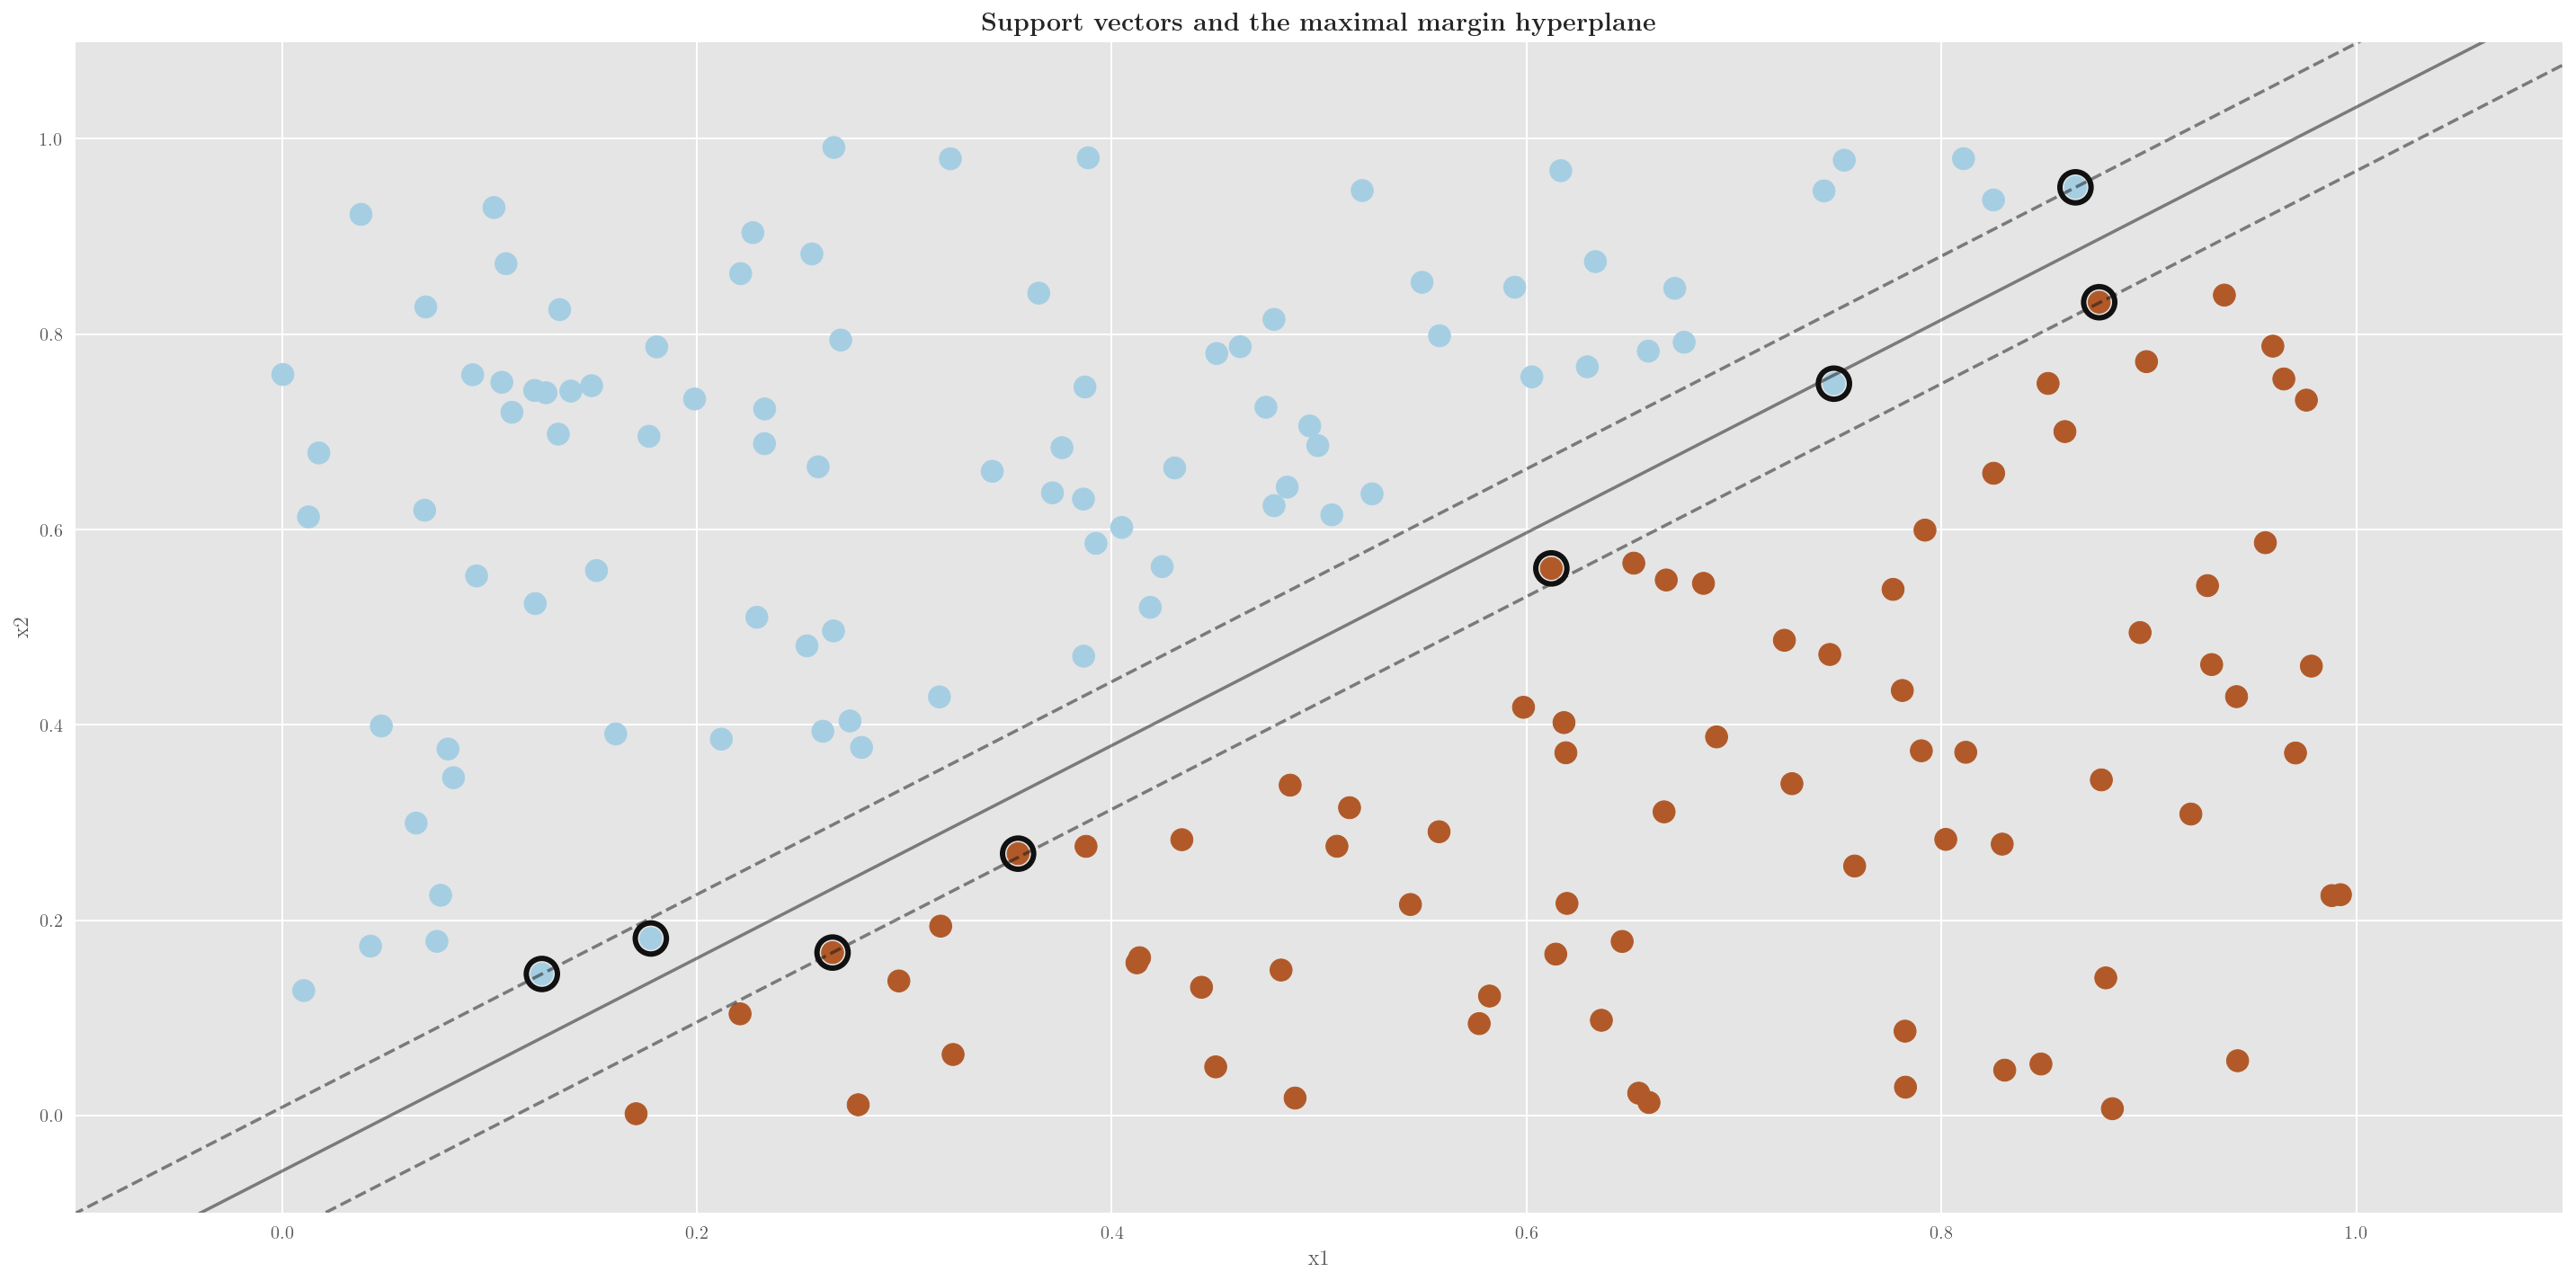

In [29]:
plt.scatter(X.x1, X.x2, c=y, s=150, cmap=plt.cm.Paired)

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    classifier,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)



# plot support vectors
ax.scatter(
    classifier.support_vectors_[:, 0],
    classifier.support_vectors_[:, 1],
    s=300,
    linewidth=3,
    facecolors="none",
    edgecolors="k",
    alpha=1.0
)
plt.title(r'\textbf{Support vectors and the maximal margin hyperplane}')
plt.tight_layout()

### SupportVectors for different values of the budget C

Let us study how the maximal margins and support vectors change for different values of the budget hyperparameter $C$.

Observe below how the $C$ hyperparameter gives us a bias-variance tradeoff.


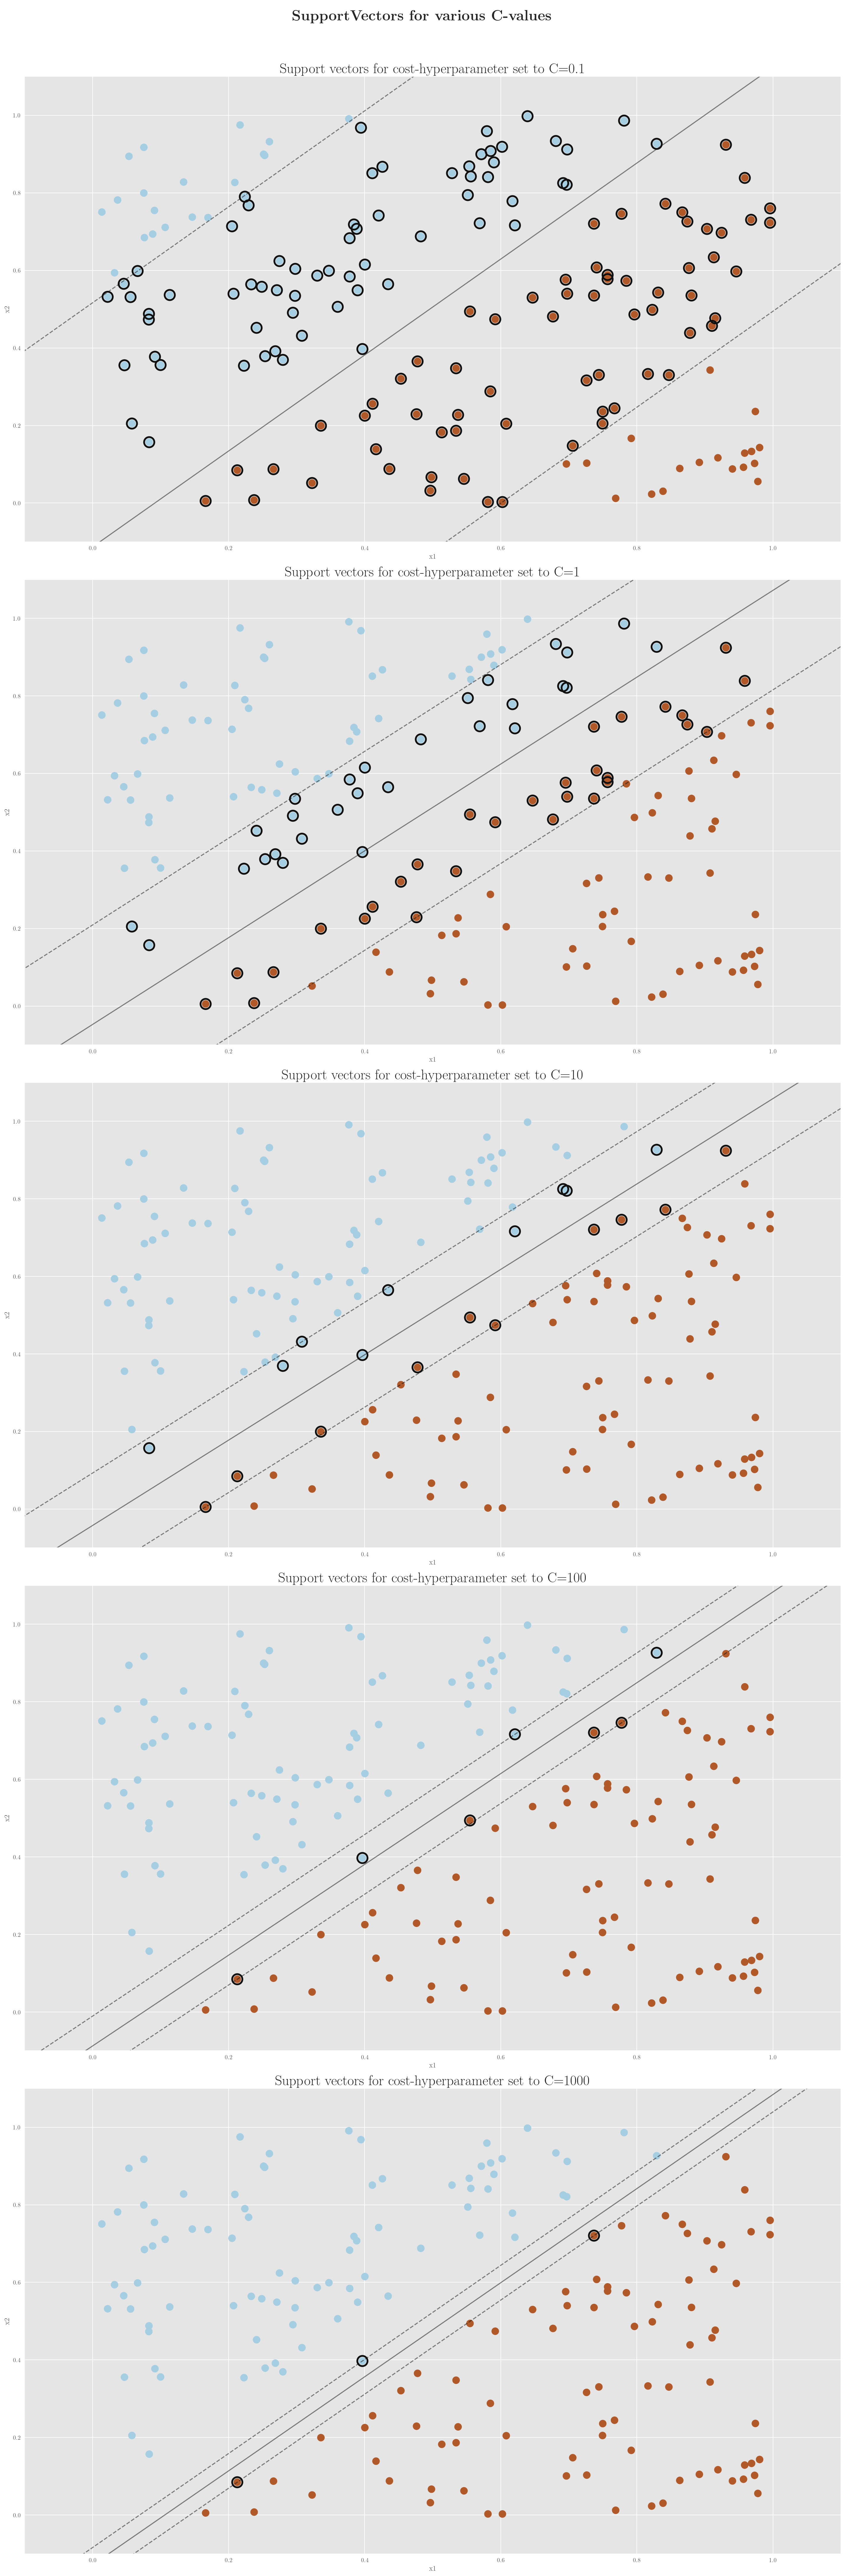

In [8]:
#plt.xlim(-0.1,1.1)
#plt.ylim(-0.1,1.1)

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20,60))


for index, C in enumerate([0.1, 1,10,100,1000]):
    classifier = SVC(kernel='linear', C=C)
    classifier.fit(X, y)
    ax[index].set_xlim(-0.1,1.1)
    ax[index].set_ylim(-0.1,1.1)
    ax[index].scatter(X.x1, X.x2, c=y, s=150, cmap=plt.cm.Paired)


    DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax[index],
    )



    # plot support vectors
    ax[index].scatter(
        classifier.support_vectors_[:, 0],
        classifier.support_vectors_[:, 1],
        s=300,
        linewidth=3,
        facecolors="none",
        edgecolors="k",
        alpha=1.0
    )
    
    
    ax[index].set_title(f'Support vectors for cost-hyperparameter set to C={C}',fontsize=24)

plt.suptitle(r'\Huge\textbf{SupportVectors for various C-values}', fontsize=40, y=1.01)
    
plt.tight_layout()

## River dataset

Let us now apply the Support vectors machine classifier to the river dataset. We remember that this is a highly non-linear dataset, so the appropriate kernel would be a RBF (radial basis function kernel).

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/supportvectors/ml-100/master/river.csv").dropna()
data.describe()


x1           x2            t
count  6311.000000  6311.000000  6311.000000
mean      3.477977     2.811144     0.683093
std       2.016079    84.502360     0.465308
min       0.002324  -149.995478     0.000000
25%       1.723568   -69.039539     0.000000
50%       3.436070     4.819181     1.000000
75%       5.209477    76.604580     1.000000
max       6.999034   153.720038     1.000000

In [31]:
X, y = data[['x1','x2']], data['t'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, )

In [32]:
# Let us standardize the training data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=('x', 'y'))
X_test  = scaler.transform(X_test)
X_train.describe()

x             y
count  4.733000e+03  4.733000e+03
mean   1.906590e-16  1.050877e-17
std    1.000106e+00  1.000106e+00
min   -1.717004e+00 -1.791347e+00
25%   -8.703280e-01 -8.500841e-01
50%   -1.933205e-02  1.199276e-02
75%    8.546063e-01  8.785498e-01
max    1.742853e+00  1.805539e+00

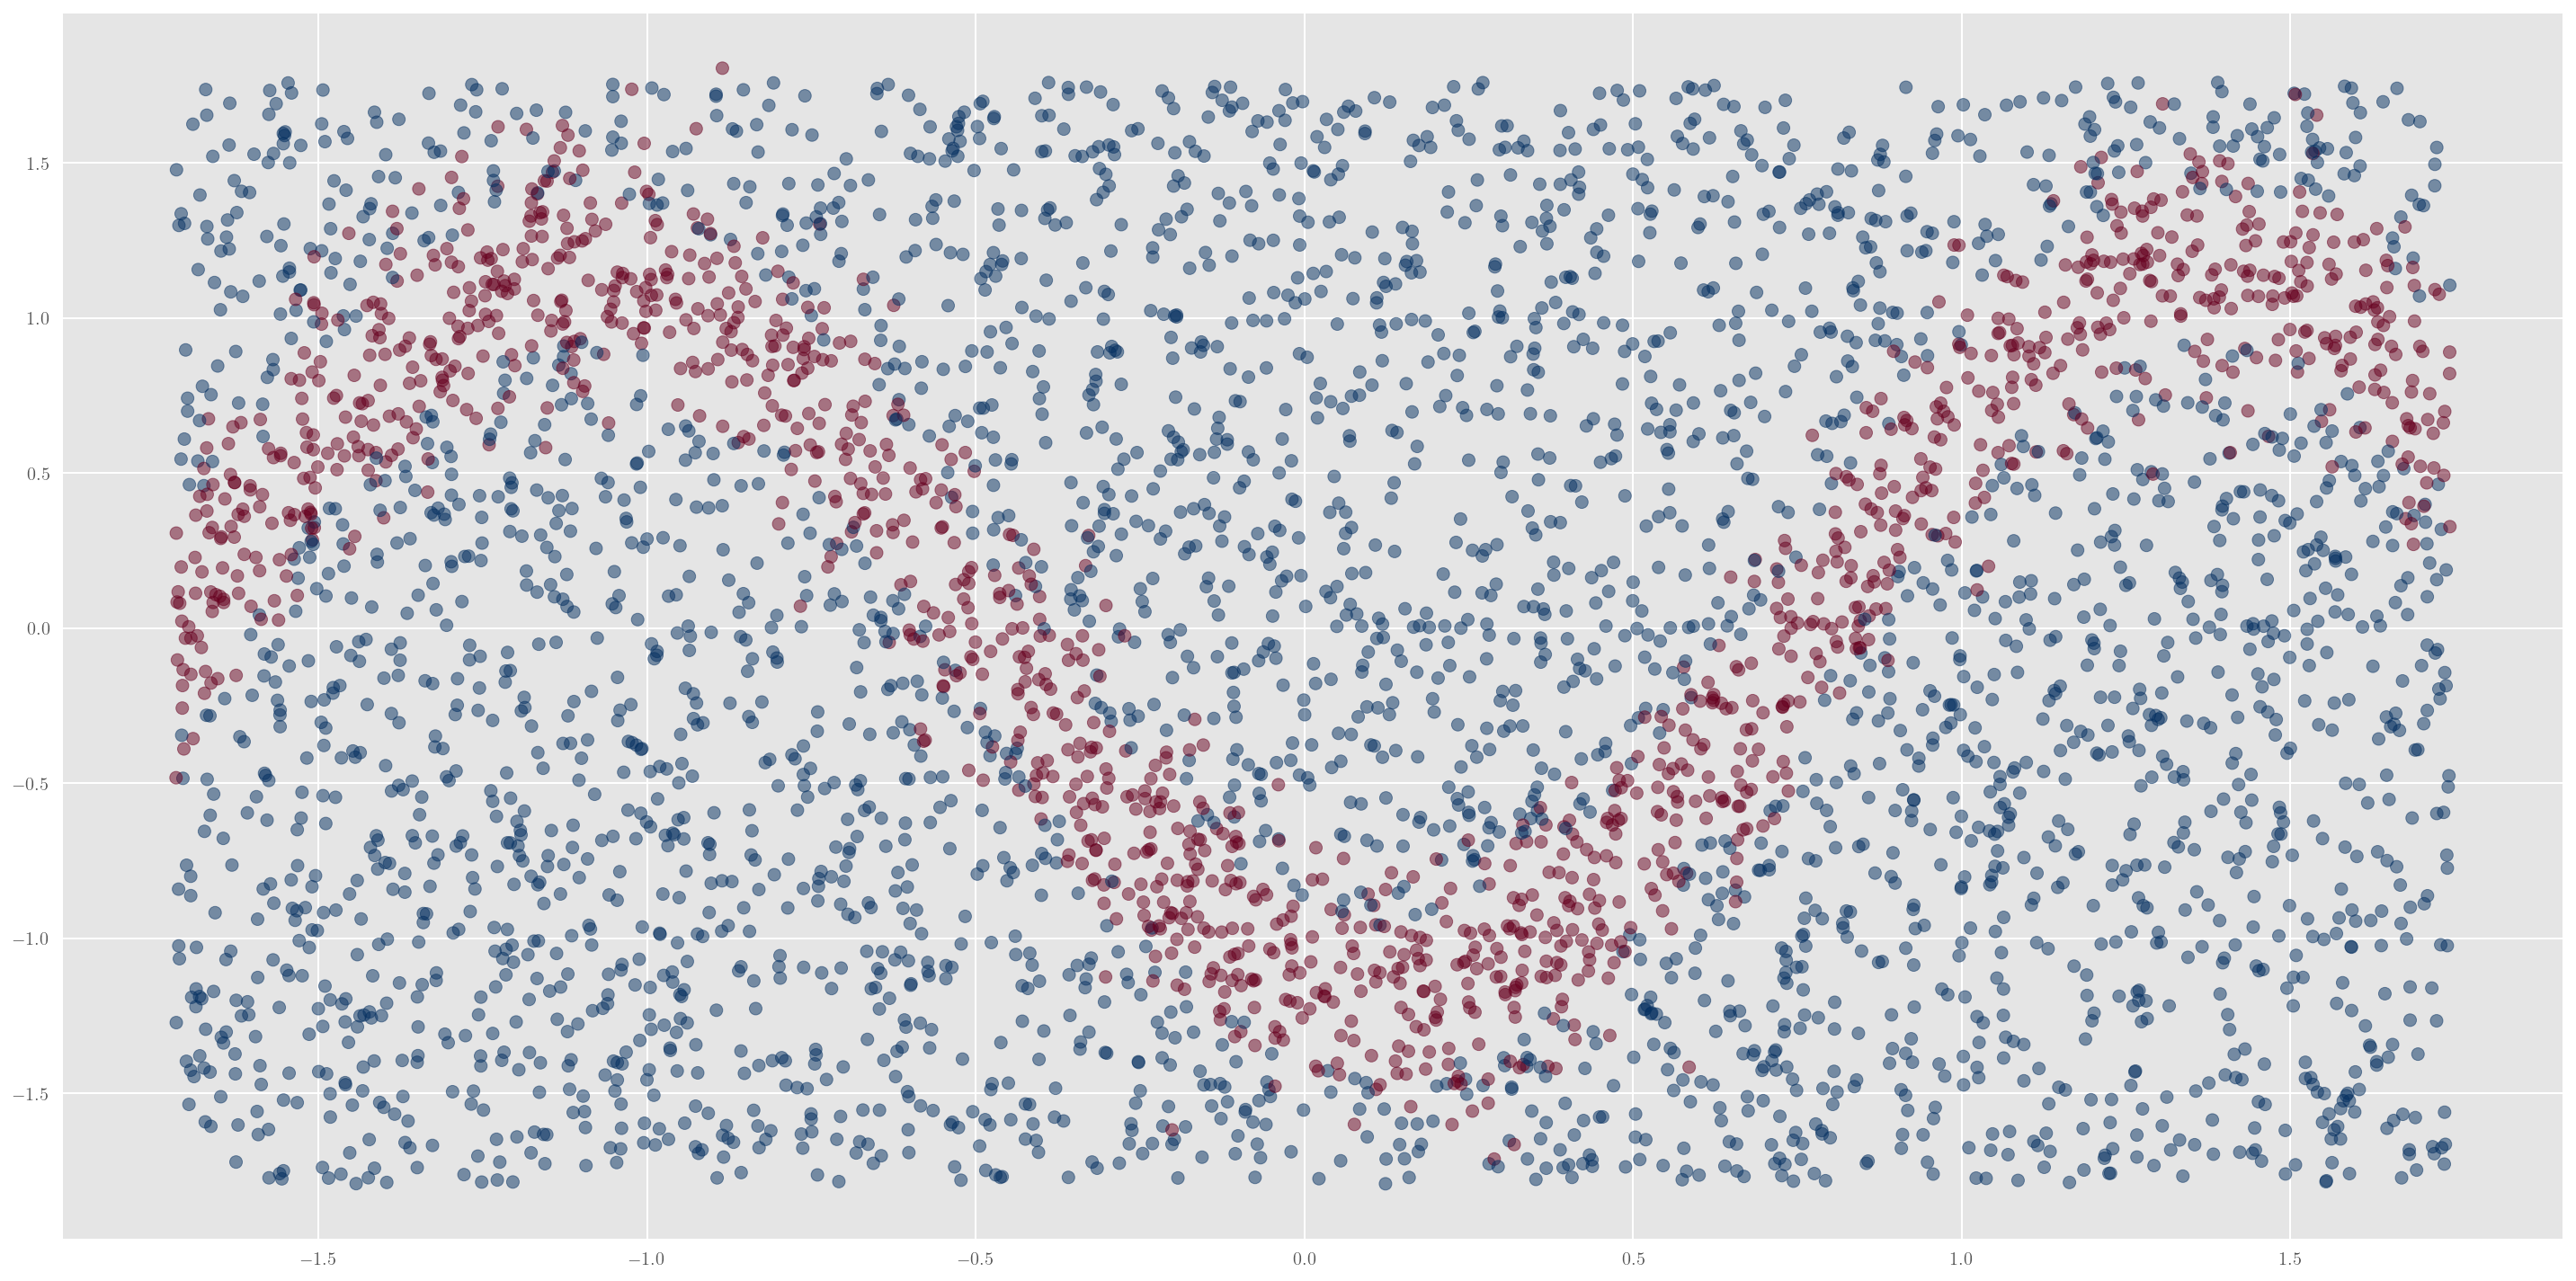

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(X_train['x'], X_train['y'], c=y_train, alpha=0.5, cmap='RdBu')
plt.tight_layout()

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly', degree=5, C=100, gamma=10, probability=True)
clf.fit(X_train, y_train)
labels = clf.predict(X_test)
matrix = confusion_matrix (y_test, labels)
report = classification_report (y_test, labels)
print (matrix)
print (report)


In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(X_train.x, X_train.y, c=y_train, s=30, cmap=plt.cm.Paired, alpha=0.5)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,        
          linewidth=3,
        facecolors="none",
        edgecolors="k",
        alpha=0.7
          )
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sample_x, sample_y = np.mgrid[-2:2:.01, -2:2:.01]
grid = np.c_[sample_x.ravel(), sample_y.ravel()]

probs = clf.predict_proba(grid)[:, 1].reshape(sample_x.shape)

# Now let us draw the decision-boundary
figure, axes = plt.subplots(figsize=(20,20))
contour = axes.contourf (sample_x, 
                         sample_y, 
                         probs, 
                         25, 
                         cmap="RdBu",
                         vmin=0,
                         vmax=1)
axes_color = figure.colorbar(contour)
axes_color.set_label("$P(t=1)$")
axes_color.set_ticks ([0.0, 0.5, 1.0])


#Labels, etc.
axes.set(aspect="equal", 
         xlim=(-2,2),
         ylim=(-2,2),
         xlabel="$x$",
         ylabel="$y$"
        )
plt.tight_layout()